In [10]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [11]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
   city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
   # If the city is unique, then add it to a our cities list
   if city not in cities:
       cities.append(city)

cities_pd=pd.DataFrame(cities, columns=["City"])
cities_pd["lat"]=""
cities_pd["lon"]=""
cities_pd["Cloudiness"]=""
cities_pd["Country"]=""
cities_pd["Humidity"]=""
cities_pd["Max Temp"]=""
cities_pd["Wind Speed"]=""
cities_pd["Date"]=""

cities_pd.head()



,City,lat,lon,Cloudiness,Country,Humidity,Max Temp,Wind Speed,Date
0,miracema do tocantins,,,,,,,,
1,dagana,,,,,,,,
2,yarim,,,,,,,,
3,hermanus,,,,,,,,
4,khatanga,,,,,,,,


In [12]:
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = url + "appid=" + api_key + "&q="


counter= 0


print('Beginning Data Retrieval ')
print('-------------------------------------')

for index, row in cities_pd.iterrows():
   try:
       city=row["City"]
       response = requests.get(query_url + city).json()
       lat=response['coord']['lat']
       lon=response['coord']['lon']
       cloud=response['clouds']['all']
       country=response['sys']['country']
       humid=response['main']['humidity']
       max_temp=response['main']['temp_max']
       wind=response['wind']['speed']
       date=response['dt']
       
       cities_pd.at[index, "lat"] = lat
       cities_pd.at[index, "lon"] = lon
       cities_pd.at[index, "Cloudiness"] = cloud
       cities_pd.at[index, "Country"] = country
       cities_pd.at[index, "Humidity"] = humid
       cities_pd.at[index, "Max Temp"] = max_temp
       cities_pd.at[index, "Wind Speed"] = wind
       cities_pd.at[index, "Date"] = date
       print("Processing Record "+ str(counter + 1)+ " of " + str(len(cities))+ " | "+ city)
       print(query_url + city)
       counter= counter+1
   except:
       print("City Not Found")
       cities_pd.drop(labels=index,inplace=True)
     
   
       
print("-------------------------------------")
print("Data Retrieval complete")

Beginning Data Retrieval 
-------------------------------------
Processing Record 1 of 636 | miracema do tocantins
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=miracema do tocantins
Processing Record 2 of 636 | dagana
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=dagana
Processing Record 3 of 636 | yarim
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=yarim
Processing Record 4 of 636 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=hermanus
Processing Record 5 of 636 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=khatanga
Processing Record 6 of 636 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=hobart
Processing Record 7 of 636 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de

Processing Record 61 of 636 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=bredasdorp
Processing Record 62 of 636 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=puerto ayora
City Not Found
Processing Record 63 of 636 | sumenep
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=sumenep
Processing Record 64 of 636 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=vaini
Processing Record 65 of 636 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=bethel
Processing Record 66 of 636 | quang ngai
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=quang ngai
Processing Record 67 of 636 | biankouma
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=biankouma
Processing Record 68 of 636

Processing Record 120 of 636 | cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=cabedelo
Processing Record 121 of 636 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=tautira
Processing Record 122 of 636 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=kahului
Processing Record 123 of 636 | castro
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=castro
Processing Record 124 of 636 | tual
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=tual
City Not Found
Processing Record 125 of 636 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=moose factory
Processing Record 126 of 636 | aksu
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=aksu
Processing Record 127 of 636 | macae
htt

Processing Record 179 of 636 | mackenzie
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=mackenzie
Processing Record 180 of 636 | puerto carreno
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=puerto carreno
Processing Record 181 of 636 | tarnowskie gory
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=tarnowskie gory
Processing Record 182 of 636 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=hithadhoo
Processing Record 183 of 636 | east london
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=east london
Processing Record 184 of 636 | boende
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=boende
Processing Record 185 of 636 | sedam
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=sedam
Processing Reco

Processing Record 238 of 636 | methoni
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=methoni
Processing Record 239 of 636 | paita
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=paita
Processing Record 240 of 636 | tirano
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=tirano
Processing Record 241 of 636 | atambua
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=atambua
City Not Found
Processing Record 242 of 636 | nome
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=nome
Processing Record 243 of 636 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=los llanos de aridane
Processing Record 244 of 636 | aswan
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=aswan
Processing Record 245 of 636

Processing Record 297 of 636 | nizhniy odes
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=nizhniy odes
Processing Record 298 of 636 | egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=egvekinot
Processing Record 299 of 636 | manoel urbano
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=manoel urbano
Processing Record 300 of 636 | khor
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=khor
Processing Record 301 of 636 | udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=udachnyy
Processing Record 302 of 636 | banda aceh
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=banda aceh
Processing Record 303 of 636 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=fort-shevchenko
Processing 

Processing Record 357 of 636 | upington
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=upington
Processing Record 358 of 636 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=kaitangata
Processing Record 359 of 636 | ramanathapuram
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=ramanathapuram
Processing Record 360 of 636 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=yumen
Processing Record 361 of 636 | kpalime
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=kpalime
Processing Record 362 of 636 | yuanping
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=yuanping
Processing Record 363 of 636 | mustasaari
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=mustasaari
Processing Record 364 of 636 

Processing Record 417 of 636 | dalbandin
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=dalbandin
Processing Record 418 of 636 | arbazh
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=arbazh
Processing Record 419 of 636 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=half moon bay
Processing Record 420 of 636 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=deputatskiy
Processing Record 421 of 636 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=grindavik
Processing Record 422 of 636 | muroto
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=muroto
Processing Record 423 of 636 | nyurba
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=nyurba
Processing Record 424 of 636 | ko

Processing Record 476 of 636 | maldonado
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=maldonado
Processing Record 477 of 636 | naifaru
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=naifaru
Processing Record 478 of 636 | aldan
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=aldan
Processing Record 479 of 636 | mitu
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=mitu
Processing Record 480 of 636 | ucluelet
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=ucluelet
Processing Record 481 of 636 | tyshkivka
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=tyshkivka
Processing Record 482 of 636 | garowe
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=garowe
Processing Record 483 of 636 | geraldton
http://api.openw

Processing Record 536 of 636 | la crosse
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=la crosse
Processing Record 537 of 636 | lahuachaca
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=lahuachaca
Processing Record 538 of 636 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=cayenne
Processing Record 539 of 636 | port augusta
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=port augusta
Processing Record 540 of 636 | touros
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=touros
Processing Record 541 of 636 | matehuala
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=matehuala
Processing Record 542 of 636 | panama city
http://api.openweathermap.org/data/2.5/weather?appid=e469c0ec36d66c86de07c8ba86e4ac7a&q=panama city
Processing Record 543 of 

In [17]:
cities_pd.head()

,City,lat,lon,Cloudiness,Country,Humidity,Max Temp,Wind Speed,Date
0,miracema do tocantins,-9.56,-48.4,32,BR,28,308.67,4.06,1530989028
1,dagana,16.52,-15.51,0,MR,42,310.15,1,1530986400
2,yarim,14.3,44.38,32,YE,47,291.07,1.56,1530989028
3,hermanus,-34.42,19.24,0,ZA,68,281.87,1.16,1530989028
4,khatanga,71.98,102.47,80,RU,63,282.87,3.31,1530989028


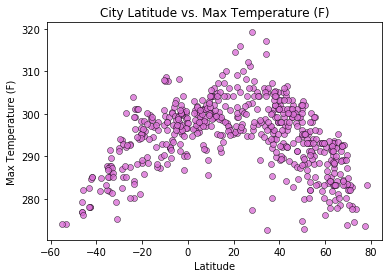

In [20]:

# Create plot# Create 
plt.scatter (cities_pd["lat"], cities_pd["Max Temp"], marker='o',
         alpha=0.8, linewidth=0.5, edgecolor="black", color="orchid")

plt.title("City Latitude vs. Max Temperature (F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.show()

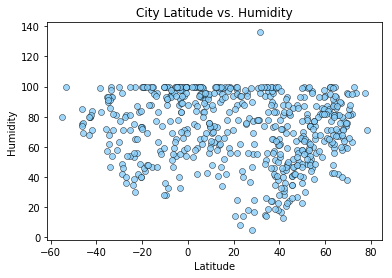

In [22]:
# Create plot
plt.scatter (cities_pd["lat"], cities_pd["Humidity"], marker='o',
         alpha=0.8, linewidth=0.5, edgecolor="black", color="lightskyblue")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

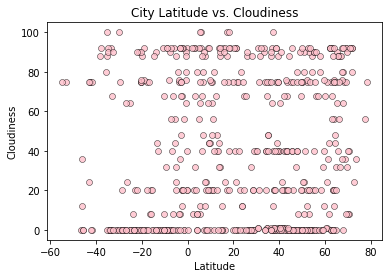

In [23]:
# Create plot
plt.scatter (cities_pd["lat"], cities_pd["Cloudiness"], marker='o',
         alpha=0.8, linewidth=0.5, edgecolor="black", color="pink")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

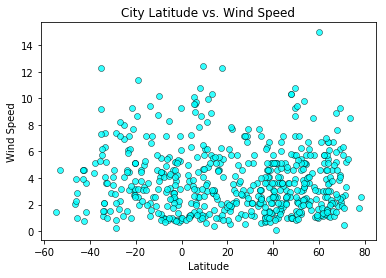

In [24]:
# Create plot
plt.scatter (cities_pd["lat"], cities_pd["Wind Speed"], marker='o',
         alpha=0.8, linewidth=0.5, edgecolor="black", color="cyan")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

In [ ]:
#Analysis:
#The biggest trend to be seen is the max temperature vs. latitude. The highest temperatures are clustered between -20 and 20 latitude. The cities that are closer to the equator are also warmer.
#Wind speed is evenly spread across the different cities. There appears to be no correlation between latitude and wind speed.
#There are many cities with 100% humidity spread out across the different degrees of latitude; there doesn't appear to be a connection there, either.
#One last note, the lowest temperatures are located on the higher degrees of latitude (80 instead of -20).